# Instant Gratification Exploration Data Analysis
This is an anonymized, binary classification dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
print("Number of rows and columns in train set : ",train.shape)
print("Number of rows and columns in test set : ",test.shape)

Number of rows and columns in train set :  (262144, 258)
Number of rows and columns in test set :  (131073, 257)


In [3]:
pd.set_option('max_columns',258)
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

In [4]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

# Target Exploration

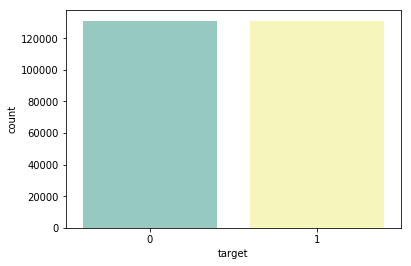

In [5]:
sns.countplot(train['target'], palette='Set3')

In [6]:
train.target.value_counts()

1    131131
0    131013
Name: target, dtype: int64

# Basic describtion

In [7]:
pd.set_option('max_rows',258)
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

In [8]:
test.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

# Missing Value Check

In [9]:
train.isnull().sum()

id                                            0
muggy-smalt-axolotl-pembus                    0
dorky-peach-sheepdog-ordinal                  0
slimy-seashell-cassowary-goose                0
snazzy-harlequin-chicken-distraction          0
frumpy-smalt-mau-ordinal                      0
stealthy-beige-pinscher-golden                0
chummy-cream-tarantula-entropy                0
hazy-emerald-cuttlefish-unsorted              0
nerdy-indigo-wolfhound-sorted                 0
leaky-amaranth-lizard-sorted                  0
ugly-tangerine-chihuahua-important            0
shaggy-silver-indri-fimbus                    0
flaky-chocolate-beetle-grandmaster            0
squirrely-harlequin-sheep-sumble              0
freaky-tan-angelfish-noise                    0
lousy-plum-penguin-sumble                     0
bluesy-rose-wallaby-discard                   0
baggy-copper-oriole-dummy                     0
stealthy-scarlet-hound-fepid                  0
greasy-cinnamon-bonobo-contributor      

In [10]:
test.isnull().sum()

id                                            0
muggy-smalt-axolotl-pembus                    0
dorky-peach-sheepdog-ordinal                  0
slimy-seashell-cassowary-goose                0
snazzy-harlequin-chicken-distraction          0
frumpy-smalt-mau-ordinal                      0
stealthy-beige-pinscher-golden                0
chummy-cream-tarantula-entropy                0
hazy-emerald-cuttlefish-unsorted              0
nerdy-indigo-wolfhound-sorted                 0
leaky-amaranth-lizard-sorted                  0
ugly-tangerine-chihuahua-important            0
shaggy-silver-indri-fimbus                    0
flaky-chocolate-beetle-grandmaster            0
squirrely-harlequin-sheep-sumble              0
freaky-tan-angelfish-noise                    0
lousy-plum-penguin-sumble                     0
bluesy-rose-wallaby-discard                   0
baggy-copper-oriole-dummy                     0
stealthy-scarlet-hound-fepid                  0
greasy-cinnamon-bonobo-contributor      

# Uniqule Count Check

In [11]:
feats = [f for f in train.columns if f not in ['id','target']]
for i in feats:
    print ('==' + str(i) + '==')
    print ('train:' + str(train[i].nunique()/train.shape[0]))
    print ('test:' + str(test[i].nunique()/test.shape[0]))

==muggy-smalt-axolotl-pembus==
train:0.9701614379882812
test:0.9845200765985367
==dorky-peach-sheepdog-ordinal==
train:0.9711761474609375
test:0.9854432262937447
==slimy-seashell-cassowary-goose==
train:0.9702911376953125
test:0.9849778367779787
==snazzy-harlequin-chicken-distraction==
train:0.97113037109375
test:0.9859238744821588
==frumpy-smalt-mau-ordinal==
train:0.9701919555664062
test:0.9846421459797212
==stealthy-beige-pinscher-golden==
train:0.9699630737304688
test:0.9849091727510624
==chummy-cream-tarantula-entropy==
train:0.9701690673828125
test:0.9847565860245817
==hazy-emerald-cuttlefish-unsorted==
train:0.96978759765625
test:0.9850846474865151
==nerdy-indigo-wolfhound-sorted==
train:0.9718017578125
test:0.9856949943924378
==leaky-amaranth-lizard-sorted==
train:0.9697151184082031
test:0.9851151648318113
==ugly-tangerine-chihuahua-important==
train:0.9695816040039062
test:0.9851761995224035
==shaggy-silver-indri-fimbus==
train:0.9687652587890625
test:0.9844285245626483
==flak

# Density plots of features

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

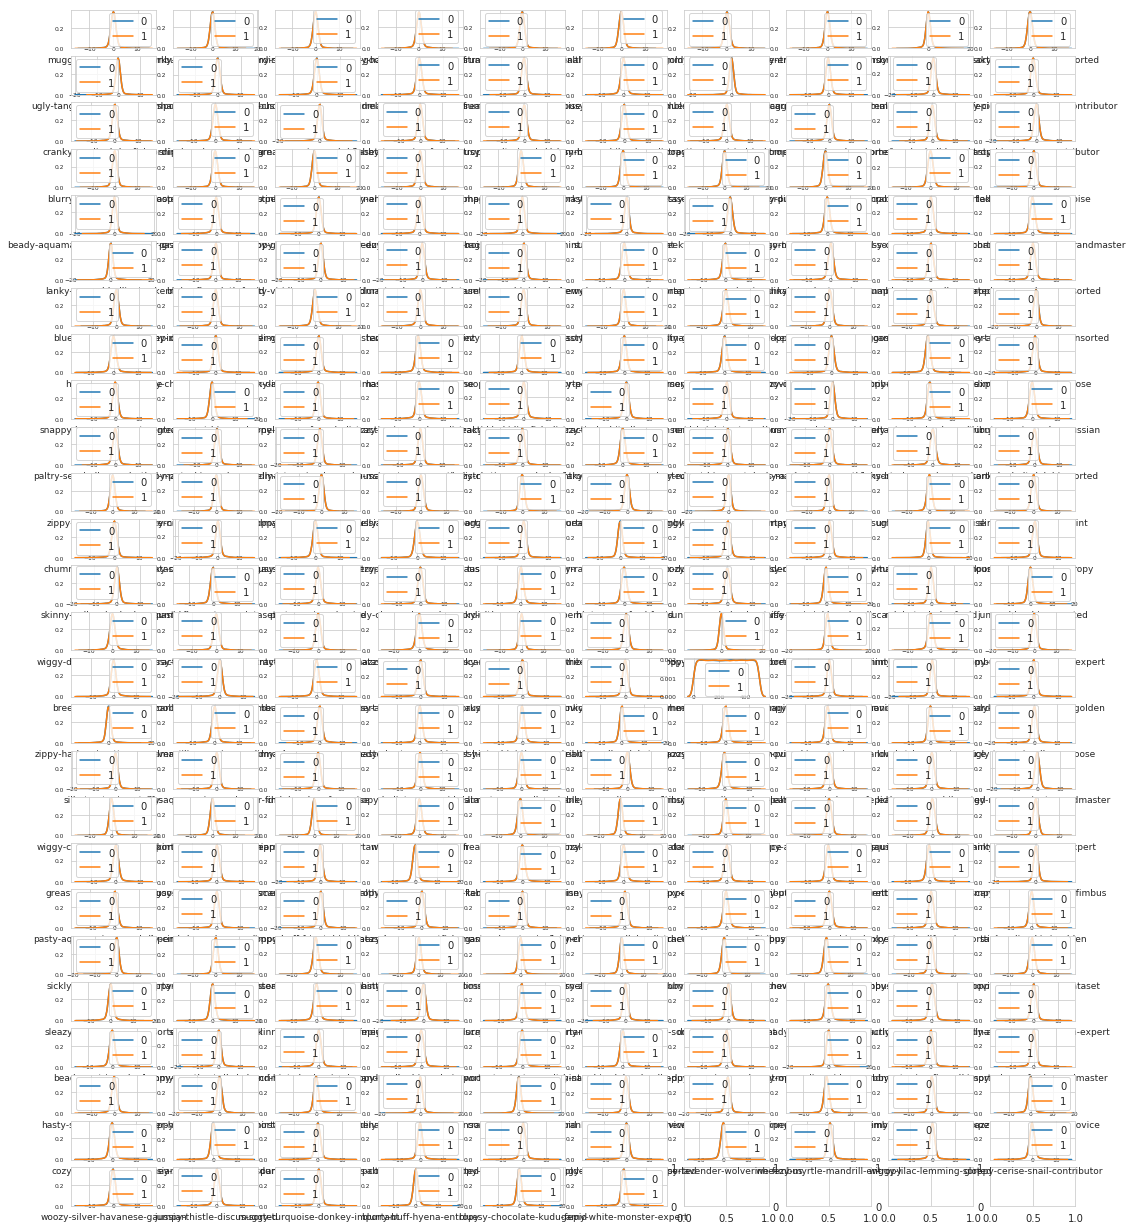

In [12]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(26,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(26,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = train[feats].columns.values
plot_feature_distribution(t0, t1, '0', '1', features)    

# Distribution of mean and std

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


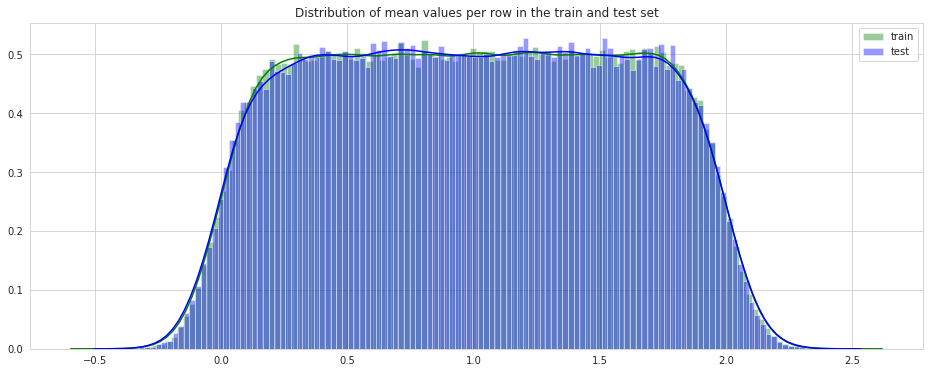

In [13]:
plt.figure(figsize=(16,6))
features = train[feats].columns.values
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


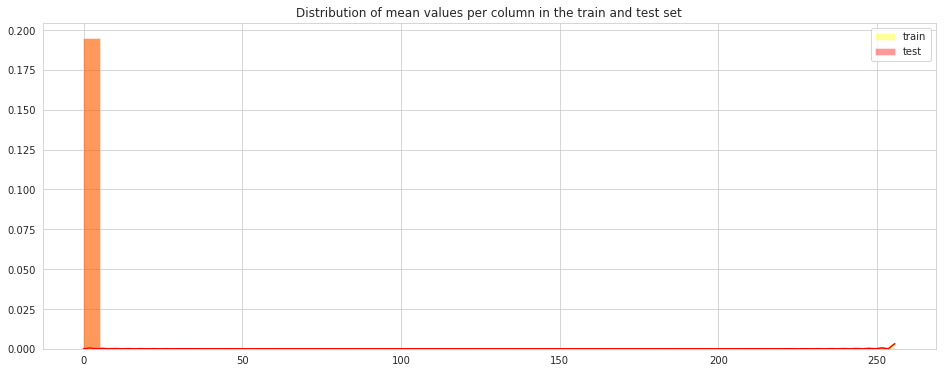

In [14]:
plt.figure(figsize=(16,6))
features = train[feats].columns.values
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="yellow",kde=True,bins=50, label='train')
sns.distplot(test[features].mean(axis=0),color="red", kde=True,bins=50, label='test')
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


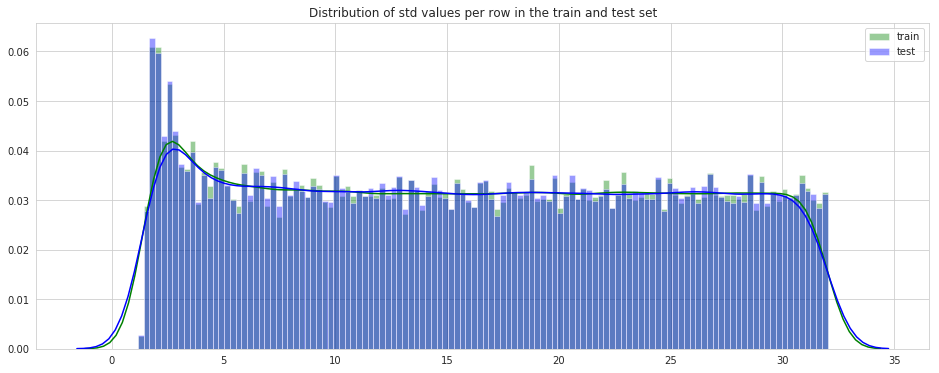

In [15]:
plt.figure(figsize=(16,6))
features = train[feats].columns.values
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


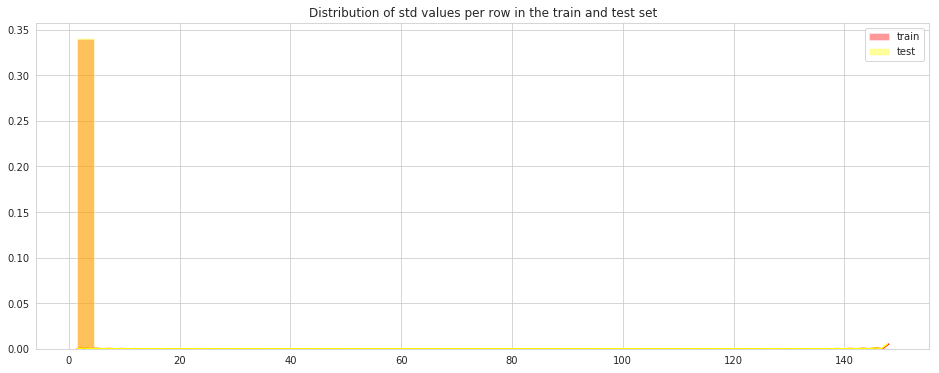

In [16]:
plt.figure(figsize=(16,6))
features = train[feats].columns.values
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=0),color="red", kde=True,bins=50, label='train')
sns.distplot(test[features].std(axis=0),color="yellow", kde=True,bins=50, label='test')
plt.legend()
plt.show()

# Feature Correlation

In [17]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,flimsy-turquoise-fox-kernel,homely-ruby-bulldog-entropy,1.743314e-08
1,homely-ruby-bulldog-entropy,flimsy-turquoise-fox-kernel,1.743314e-08
2,flaky-crimson-wallaby-distraction,leaky-grey-gerbil-sorted,4.006599e-08
3,leaky-grey-gerbil-sorted,flaky-crimson-wallaby-distraction,4.006599e-08
4,stinky-maroon-blue-kernel,leaky-amaranth-lizard-sorted,4.644567e-08
5,leaky-amaranth-lizard-sorted,stinky-maroon-blue-kernel,4.644567e-08
6,lanky-coral-moorhen-expert,leaky-grey-gerbil-sorted,7.148392e-08
7,leaky-grey-gerbil-sorted,lanky-coral-moorhen-expert,7.148392e-08
8,breezy-persimmon-newt-noise,slimy-plum-cassowary-master,1.683237e-07
9,slimy-plum-cassowary-master,breezy-persimmon-newt-noise,1.683237e-07


In [18]:
correlations.tail(10)

,level_0,level_1,0
65270,skanky-cobalt-dolphin-sorted,beady-mauve-frog-distraction,0.012648
65271,beady-mauve-frog-distraction,skanky-cobalt-dolphin-sorted,0.012648
65272,shaggy-silver-indri-fimbus,skimpy-chocolate-dog-learn,0.013359
65273,skimpy-chocolate-dog-learn,shaggy-silver-indri-fimbus,0.013359
65274,zippy-cerise-weasel-contributor,snoopy-red-zonkey-unsorted,0.014360
65275,snoopy-red-zonkey-unsorted,zippy-cerise-weasel-contributor,0.014360
65276,squirrely-apricot-goat-hint,wheezy-copper-turtle-magic,0.014700
65277,wheezy-copper-turtle-magic,squirrely-apricot-goat-hint,0.014700
65278,wheezy-copper-turtle-magic,trippy-asparagus-bison-expert,0.015849
65279,trippy-asparagus-bison-expert,wheezy-copper-turtle-magic,0.015849


# Target and Feature Correlation

In [19]:
feats_target = [f for f in train.columns if f not in ['id']]
correlations = train[feats_target].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
corr = correlations[correlations['level_0']=='target']
corr.head(300)

,level_0,level_1,0
252,target,snappy-purple-bobcat-important,0.000015
260,target,snappy-gamboge-caterpillar-dummy,0.000016
533,target,bumpy-amaranth-bonobo-gaussian,0.000030
1516,target,zippy-harlequin-otter-grandmaster,0.000083
1576,target,snazzy-cerise-donkey-distraction,0.000086
1723,target,sickly-denim-oriole-important,0.000094
1859,target,freaky-tan-angelfish-noise,0.000100
1906,target,cranky-champagne-jackal-gaussian,0.000103
1915,target,smelly-brown-deer-entropy,0.000103
1936,target,cranky-magenta-mammoth-distraction,0.000104
